In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/train.csv')

### 57920개의 데이터
* ID : 샘플 별 고유 id
* 생산년도 : 차량이 생산된 연도
* 모델출시년도 : 차량의 모델이 처음으로 출시된 연도
* 브랜드
* 차량모델명
* 판매도시 : 3글자로 인코딩된 도시 이름
* 판매구역 : 3글자로 인코딩된 구역 이름
* 주행거리 : 총 주행 거리(km)
* 배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
* 압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
* 경유 : 경유 자동차 여부
* 가솔린 : 가솔린 자동차 여부
* 하이브리드 : 하이브리드 자동차 여부
* 액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
* 가격 : 자동차 가격(백만원)

In [4]:
data.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


* 널값 체크

In [5]:
data.isnull().sum()

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


### 데이터 분석
* 최종 가격은 실수형
* 브랜드, 차량모델 명, 판매도시, 구역 글자로 구성

In [8]:
data.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [10]:
data.columns

Index(['ID', '생산년도', '모델출시년도', '브랜드', '차량모델명', '판매도시', '판매구역', '주행거리', '배기량',
       '압축천연가스(CNG)', '경유', '가솔린', '하이브리드', '액화석유가스(LPG)', '가격'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["브랜드_Label"] = le.fit_transform(data["브랜드"])

data["차량모델명_Label"] = le.fit_transform(data["차량모델명"])

data["판매도시_Label"] = le.fit_transform(data["판매도시"])

data["판매구역_Label"] = le.fit_transform(data["판매구역"])

sel = ["판매도시","브랜드","차량모델명","판매구역"]

data = data.drop(sel,axis=1)

In [17]:
data

,ID,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,브랜드_Label,차량모델명_Label,판매도시_Label,판매구역_Label
0,TRAIN_00000,2018,2014,85231,999,0,0,1,0,0,51.74,16,47,1214,12
1,TRAIN_00001,2010,2006,135000,1598,0,0,1,0,0,41.47,17,20,2137,13
2,TRAIN_00002,2002,2002,255223,1796,0,0,1,0,0,17.81,9,36,785,15
3,TRAIN_00003,2006,2001,238000,2184,0,1,0,0,0,18.20,11,133,546,15
4,TRAIN_00004,2007,2007,251000,1910,0,1,0,0,0,17.55,3,25,1839,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,64839,1461,0,1,0,0,0,116.87,9,23,1957,15
57916,TRAIN_57916,2006,2005,299850,1796,0,0,1,0,0,15.47,12,142,2941,16
57917,TRAIN_57917,2013,2003,112000,1368,0,0,1,0,0,21.97,3,90,287,6
57918,TRAIN_57918,2006,2004,189321,1598,0,0,1,0,0,16.77,12,19,3174,0


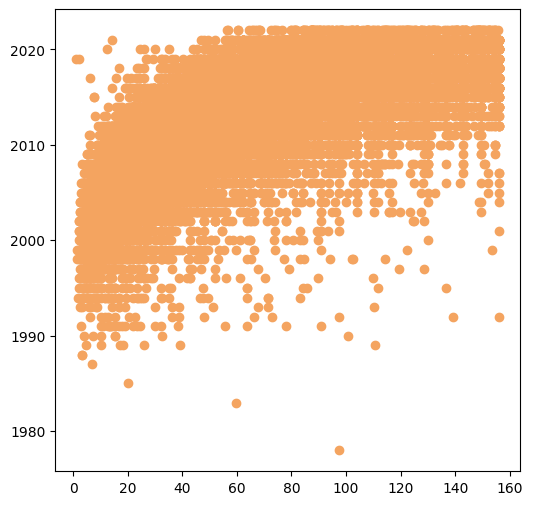

In [20]:
fig,ax = plt.subplots(figsize=(6,6))

ax.scatter( data['가격'], data['생산년도'], color="sandybrown")